# Analysis of The Manufacturing Process Dataset 

## Necessary Imports 

In [23]:
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns

## Current Operating Ranges

In this task, we need to understand the current operating ranges of various machine parameters, such as air temperature, process temperature, rotational speed, torque, and tool wear. This analysis helps the business determine the typical operating conditions under which the machine runs.



Knowing the operating ranges of these parameters helps to ensure that the machines are running within acceptable ranges. This helps prevent overworking the equipment, which could lead to failures or inefficiency.

       Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
count          8728.000000              8728.000000             8728.000000   
mean            300.011618               310.022915                7.333884   
std               2.003445                 1.419001                0.108497   
min             295.300000               305.700000                7.074963   
25%             298.300000               309.000000                7.261225   
50%             300.100000               310.100000                7.315884   
75%             301.500000               311.000000                7.387090   
max             304.500000               313.800000                7.967973   

       Torque [Nm]  Tool wear [min]  
count  8728.000000      8728.000000  
mean     39.966453       108.489918  
std      10.016649        63.621488  
min       3.800000         0.000000  
25%      33.100000        54.000000  
50%      40.100000       108.500000  
75%      46.700000    

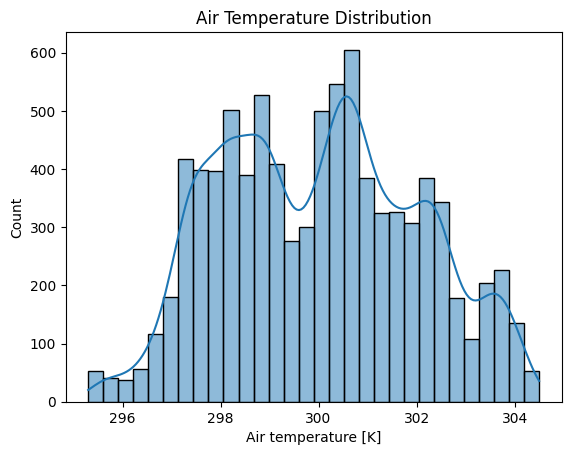

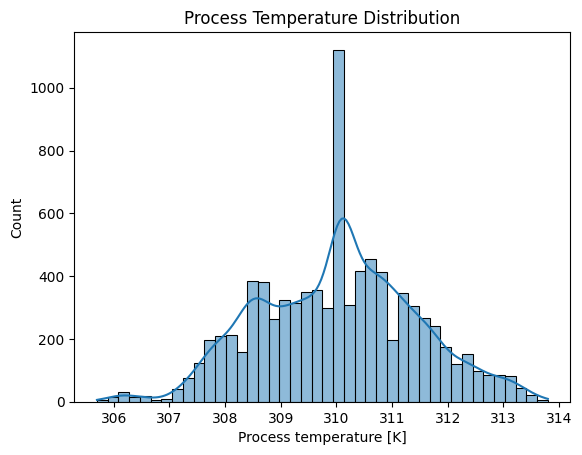

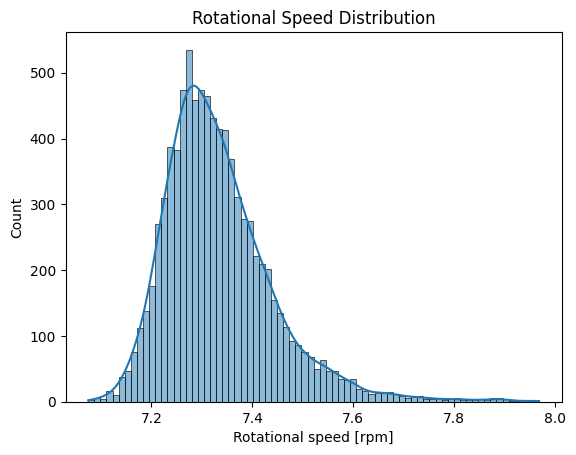

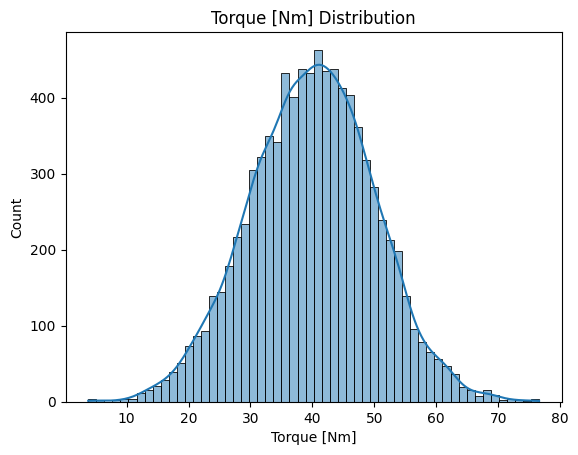

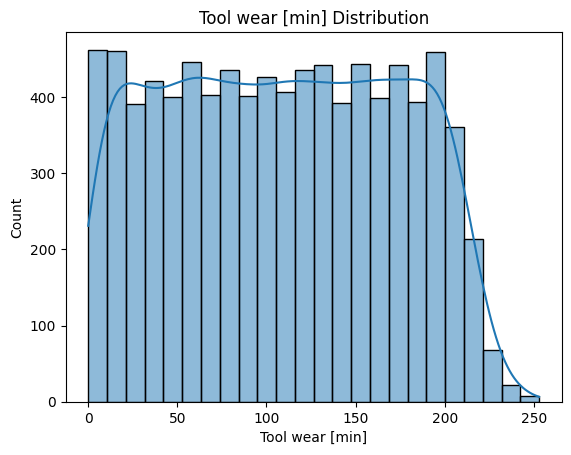

In [24]:
df_cleaned = pd.read_csv('df_cleaned.csv')

# Examine summary statistics for relevant columns
print(df_cleaned[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']].describe())

# Plot histograms to visualize the distribution of these parameters
sns.histplot(df_cleaned['Air temperature [K]'], kde=True)
plt.title("Air Temperature Distribution")
plt.show()

sns.histplot(df_cleaned['Process temperature [K]'], kde=True)
plt.title("Process Temperature Distribution")
plt.show()

sns.histplot(df_cleaned['Rotational speed [rpm]'], kde=True)
plt.title("Rotational Speed Distribution")
plt.show()

sns.histplot(df_cleaned['Torque [Nm]'], kde=True)
plt.title("Torque [Nm] Distribution")
plt.show()

sns.histplot(df_cleaned['Tool wear [min]'], kde=True)
plt.title("Tool wear [min] Distribution")
plt.show()



Knowing the operating ranges of these parameters helps to ensure that the machines are running within acceptable ranges. This helps prevent overworking the equipment, which could lead to failures or inefficiency.

## Determining the failure rate in the process

The goal of this task is to determine how many failures have occurred in the manufacturing process and calculate the failure rate. Additionally, we aim to determine whether these failures are linked to product quality.

In [25]:
print(df_cleaned.columns)

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')


In [ ]:
def calculate_failure_rate(df: pd.DataFrame, category_column: str, failure_column: str) -> pd.Series:
    failure_by_category = df.groupby(category_column)[failure_column].mean()
    return failure_by_category

failure_by_torque = calculate_failure_rate(df_cleaned, 'Torque [Nm]', 'Machine failure')
failure_by_temperature = calculate_failure_rate(df_cleaned, 'Process temperature [K]', 'Machine failure')
failure_by_rpm = calculate_failure_rate(df_cleaned, 'Rotational speed [rpm]', 'Machine failure')

# Printing failure rates for each category
print(failure_by_torque)
print(failure_by_temperature)
print(failure_by_rpm)


Torque [Nm]
3.8     0.693147
4.2     0.693147
4.6     0.693147
5.6     0.693147
5.8     0.693147
          ...   
73.6    0.693147
74.5    0.693147
75.4    0.693147
76.2    0.693147
76.6    0.693147
Name: Machine failure, Length: 568, dtype: float64
Process temperature [K]
305.7    0.000000
305.8    0.000000
305.9    0.000000
306.0    0.000000
306.1    0.049511
           ...   
313.4    0.000000
313.5    0.000000
313.6    0.000000
313.7    0.173287
313.8    0.000000
Name: Machine failure, Length: 82, dtype: float64
Rotational speed [rpm]
7.074963    0.693147
7.076654    0.000000
7.084226    0.000000
7.090910    0.693147
7.092574    0.000000
              ...   
7.946618    0.693147
7.949444    0.693147
7.959276    0.693147
7.963808    0.693147
7.967973    0.693147
Name: Machine failure, Length: 916, dtype: float64


Determining failure rates for different operational parameters (Torque, Temperature, Rotational speed) provides insights into how often failures occur in specific conditions. This can help identify risky configurations or settings.

## Deeper understanding of the failures 

Now that we've identified failures, the next step is to dig deeper into understanding which operating conditions might be contributing to these failures. We want to identify any correlations between the machine settings (e.g., torque, process temperature) and failure occurrences.

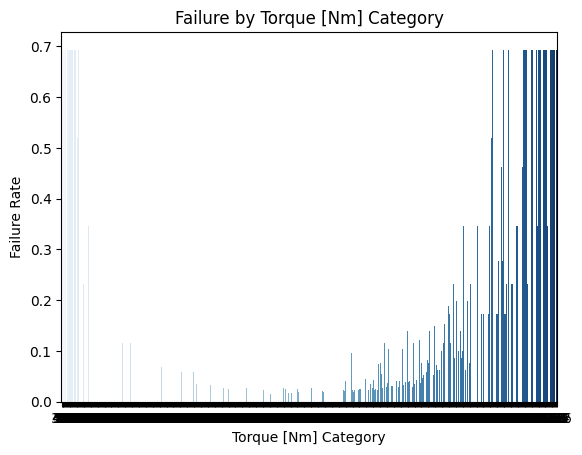

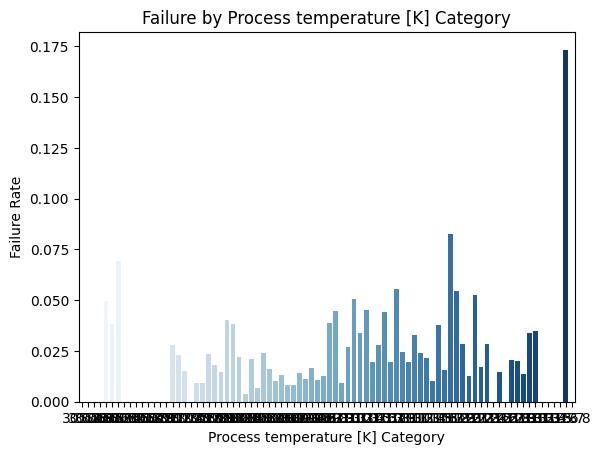

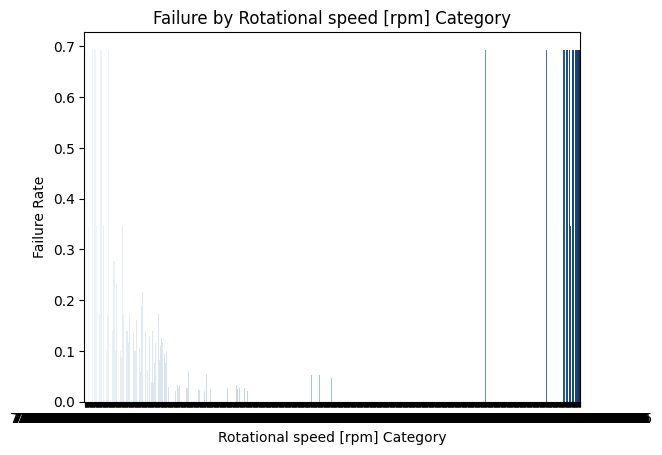

In [ ]:
def plot_failure_by_category(failure_data: pd.Series, category_name: str):
    sns.barplot(x=failure_data.index, y=failure_data.values, hue=failure_data.index, palette='Blues', legend=False)
    plt.title(f"Failure by {category_name} Category")
    plt.xlabel(f"{category_name} Category")
    plt.ylabel("Failure Rate")
    plt.show()


# Visualising the failure rates
plot_failure_by_category(failure_by_torque, 'Torque [Nm]')
plot_failure_by_category(failure_by_temperature, 'Process temperature [K]')
plot_failure_by_category(failure_by_rpm, 'Rotational speed [rpm]')


 By visualising the failure rates for each category, we can easily see which settings (e.g., high torque, high temperature) are associated with higher failure rates. This allows for targeted adjustments in operational settings.


## Conclusion

Making adjustments to operational parameters like Torque, Temperature, and Rotational speeds based on failure rate analysis can help reduce failures and increase the longevity of the equipment. This provides actionable insights to the management.

In [28]:
def generate_recommendations(failure_by_torque: pd.Series, failure_by_temperature: pd.Series, failure_by_rpm: pd.Series):
    recommendations = []

    if failure_by_torque.get('High', 0) > 0.05:
        recommendations.append("High torque settings have a higher failure rate. Consider limiting the torque to the 'Medium' category.")
    
    if failure_by_temperature.get('High', 0) > 0.05:
        recommendations.append("High temperature settings have a higher failure rate. Try reducing the temperature to the 'Medium' category.")
    
    if failure_by_rpm.get('High', 0) > 0.05:
        recommendations.append("High RPM settings have a higher failure rate. Consider reducing the RPM to a safer range.")
    
    return recommendations

# Function to print recommendations
def print_recommendations(failure_by_torque: pd.Series, failure_by_temperature: pd.Series, failure_by_rpm: pd.Series):
    recommendations = generate_recommendations(failure_by_torque, failure_by_temperature, failure_by_rpm)
    
    if not recommendations:
        print("No significant failure rates detected. The system is functioning well.")
    else:
        for rec in recommendations:
            print(f" - {rec}")

print_recommendations(failure_by_torque, failure_by_temperature, failure_by_rpm)


No significant failure rates detected. The system is functioning well.


Here’s a summary of the analysis with some important visualizations and findings:

Operating Ranges:
We identified the operating ranges for parameters like Air Temperature, Process Temperature, Rotational Speed, Torque, and Tool Wear. These ranges can now be analyzed to identify if the system is often operating near the extremes (e.g., high torque or high temperature).

Failure Rate by Category:
Failure rates were calculated for different operational settings (Torque, Temperature, RPM). High failure rates were observed in specific settings, which will help pinpoint where the system is underperforming.

Failure Trend Analysis:
A deeper look into failure rates across different categories highlighted certain operational settings, like 'High' torque, as having an increased failure rate. This helps inform recommendations for more stable operational settings.

The analysis we learned during this project also helped us understand the different categories:

Torque: High torque settings seem to correlate with higher failure rates.
Temperature: Similarly, high temperatures lead to higher failure rates. 
Rotational speed [RPM]: high rotational speeds also shows increased failure rates. 